<a href="https://colab.research.google.com/github/shanksghub/Musk/blob/master/Keras_Binary_Classification_Corrections_(1)_(1)%20classification%20report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import Callback
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
# load dataset
url = 'https://raw.githubusercontent.com/shanksghub/Musk.csv/master/musk_csv.csv'
df = pd.read_csv(url)

In [0]:
dataset = df.values
# split into input (X) and output (Y) variables
X = df.drop(['class','ID','molecule_name','conformation_name'], axis = 1)
y = df[['class']].to_numpy().ravel()

In [0]:
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = y_test

In [36]:
# Model
model = Sequential()
model.add(Dense(256, input_shape=X.shape[1:], activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               42752     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 108,801
Trainable params: 108,801
Non-trainable params: 0
_________________________________________________________________


In [0]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

#     def on_batch_end(self, batch, logs={}):
#         self.losses.append(logs.get('loss'))

In [0]:
# loss history recorder
history = LossHistory()

In [39]:
train_history = model.fit(X_train, y_train, epochs=20, verbose=1, 
                                    validation_data=(X_test, y_test), 
                                    callbacks=[history])

Train on 5278 samples, validate on 1320 samples
Epoch 1/20
5278/5278 [==============================] - 1s 156us/step - loss: 0.2584 - acc: 0.8979 - val_loss: 0.1851 - val_acc: 0.9288
Epoch 2/20
5278/5278 [==============================] - 1s 95us/step - loss: 0.1749 - acc: 0.9329 - val_loss: 0.1590 - val_acc: 0.9356
Epoch 3/20
5278/5278 [==============================] - 1s 95us/step - loss: 0.1461 - acc: 0.9443 - val_loss: 0.1334 - val_acc: 0.9477
Epoch 4/20
5278/5278 [==============================] - 0s 91us/step - loss: 0.1269 - acc: 0.9534 - val_loss: 0.1162 - val_acc: 0.9561
Epoch 5/20
5278/5278 [==============================] - 1s 96us/step - loss: 0.1052 - acc: 0.9621 - val_loss: 0.1007 - val_acc: 0.9659
Epoch 6/20
5278/5278 [==============================] - 0s 90us/step - loss: 0.0884 - acc: 0.9670 - val_loss: 0.0936 - val_acc: 0.9667
Epoch 7/20
5278/5278 [==============================] - 0s 91us/step - loss: 0.0776 - acc: 0.9703 - val_loss: 0.0796 - val_acc: 0.9712
Epoch 

In [40]:
train_history.history

{'acc': [0.8978779839267781,
  0.9329291398256916,
  0.9442970822507027,
  0.9533914359919543,
  0.9621068586585828,
  0.967032967032967,
  0.970253883888885,
  0.9759378552482001,
  0.9772641151951497,
  0.9833270178097764,
  0.9859795377036756,
  0.9871163319439181,
  0.988821523304282,
  0.9926108374384236,
  0.9922319060250094,
  0.997726411519515,
  0.9973474801061007,
  0.9971580143993937,
  0.9960212201591512,
  0.9954528230390299],
 'loss': [0.25841423428704585,
  0.17493180354669627,
  0.14612409583419594,
  0.12689408389184456,
  0.10517954040571409,
  0.08840862141555798,
  0.07760638499991737,
  0.0641422022731185,
  0.05623592838539815,
  0.044986660585552736,
  0.03701577666623206,
  0.03555088916453969,
  0.02912076346575508,
  0.02187498845618787,
  0.019874338148932517,
  0.012853072848479436,
  0.012899978850132145,
  0.00979252483295372,
  0.011216351644410573,
  0.016772098928855294],
 'val_acc': [0.9287878787878788,
  0.9356060606060606,
  0.9477272727272728,
  0.9

In [0]:
df = pd.DataFrame(columns=('loss', 'loss_test'))  

loss = train_history.history['loss']
val_loss = train_history.history['val_loss']

df['loss'] = loss
df['loss_test'] = val_loss

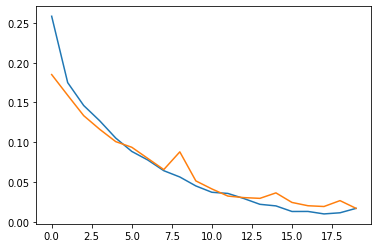

In [42]:
plt.plot(range(len(df['loss'])),df['loss'],label='loss')
plt.plot(range(len(df['loss'])),df['loss_test'],label='Val loss')

In [0]:
from keras.models import load_model
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model
# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')


In [0]:

import sklearn.model_selection
import sklearn.metrics
import sklearn.preprocessing
import keras
import numpy as np

In [0]:
y_pred = model.predict(X_test)

In [67]:

from sklearn import metrics
print(metrics.accuracy_score(y_test,np.argmax(y_pred)))


TypeError: ignored

In [69]:
print(y_pred.shape)
print(y_test.shape)


(1320, 1)
(1320,)


In [70]:
print(y_test)
print(y_pred)

[0 0 0 ... 0 0 0]
[[2.5516748e-04]
 [2.6822090e-06]
 [1.1609346e-02]
 ...
 [4.4541985e-02]
 [0.0000000e+00]
 [2.9802322e-08]]


In [46]:

    # Evaluate on training data
    print('\n-- Training data --')
    predictions = model.predict(X_train)
    accuracy = sklearn.metrics.accuracy_score(y_train, np.argmax(predictions, axis=1))
    print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
    print('Classification Report:')
    print(sklearn.metrics.classification_report(y_train, np.argmax(predictions, axis=1)))
    print('Confusion Matrix:')
    print(sklearn.metrics.confusion_matrix(y_train, np.argmax(predictions, axis=1)))
    print('')



-- Training data --
Accuracy: 84.69
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      4470
           1       0.00      0.00      0.00       808

    accuracy                           0.85      5278
   macro avg       0.42      0.50      0.46      5278
weighted avg       0.72      0.85      0.78      5278

Confusion Matrix:
[[4470    0]
 [ 808    0]]



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
print('\n-- Training data --')
predictions = np.round(model.predict(X_train).squeeze())
accuracy = sklearn.metrics.accuracy_score(y_train, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_train, predictions))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(y_train, predictions))
print('')


-- Training data --
Accuracy: 99.73
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4470
           1       0.99      1.00      0.99       808

    accuracy                           1.00      5278
   macro avg       0.99      1.00      0.99      5278
weighted avg       1.00      1.00      1.00      5278

Confusion Matrix:
[[4459   11]
 [   3  805]]



In [72]:
print('\n-- Training data --')
predictions = np.round(model.predict(X_test).squeeze())
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, predictions))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(y_test, predictions))
print('')


-- Training data --
Accuracy: 99.47
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1111
           1       0.99      0.98      0.98       209

    accuracy                           0.99      1320
   macro avg       0.99      0.99      0.99      1320
weighted avg       0.99      0.99      0.99      1320

Confusion Matrix:
[[1109    2]
 [   5  204]]

